In [2]:
# load two csv files
import pandas as pd
import numpy as np
import seaborn as sns

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

book_info = pd.read_csv('../data/clean_data/clean_book_info.csv', encoding='ISO-8859-1')
reviews_df = pd.read_csv('../data/clean_data/reviews_with_stress.csv', encoding='ISO-8859-1')

# EDA

In [3]:
reviews_df.columns

Index(['Unnamed: 0', 'title_id', 'title', 'review_no', 'review',
       'processed_text', 'predicted_stress'],
      dtype='object')

In [4]:
reviews_df = reviews_df.drop(columns='Unnamed: 0')

In [5]:
reviews_df.shape

(16860, 6)

In [6]:
book_info.shape

(1663, 41)

In [44]:
book_info.dtypes

title_id            int64
title              object
author             object
publish_date       object
pages             float64
format             object
rating            float64
rating_counts       int64
reviews_counts      int64
votes               int64
year                int64
description        object
refined_genre      object
is_bestseller       int64
award              object
dtype: object

In [45]:
book_info.nunique()

title_id          1686
title             1686
author            1304
publish_date       404
pages              416
format               8
rating             132
rating_counts     1660
reviews_counts    1547
votes             1606
year                 5
description       1686
refined_genre       21
is_bestseller        2
award               89
dtype: int64

In [46]:
book_info.describe()

,title_id,pages,rating,rating_counts,reviews_counts,votes,year,is_bestseller
count,1686.000000,1686.000000,1686.000000,1.686000e+03,1686.000000,1686.000000,1686.000000,1686.000000
mean,3276.955516,345.276987,4.046459,7.901742e+04,9173.467972,14746.444840,2020.848161,0.254448
std,1165.691971,137.123717,0.266701,1.833264e+05,18631.789505,21167.234433,1.403076,0.435680
min,111.000000,0.000000,3.160000,8.200000e+01,19.000000,383.000000,2019.000000,0.000000
25%,2937.750000,273.000000,3.840000,7.302250e+03,1080.250000,2844.250000,2020.000000,0.000000
50%,3585.500000,338.000000,4.050000,2.400350e+04,3586.500000,7365.500000,2021.000000,0.000000
75%,4150.750000,406.000000,4.240000,7.305325e+04,9216.750000,19772.750000,2022.000000,1.000000
max,4697.000000,1242.000000,4.750000,2.683087e+06,234321.000000,397565.000000,2023.000000,1.000000


In [47]:
book_info.describe(include='all')

,title_id,title,author,publish_date,pages,format,rating,rating_counts,reviews_counts,votes,year,description,refined_genre,is_bestseller,award
count,1686.000000,1686,1686,1686,1686.000000,1686,1686.000000,1.686000e+03,1686.000000,1686.000000,1686.000000,1686,1686,1686.000000,1686
unique,NaN,1686,1304,404,NaN,8,NaN,NaN,NaN,NaN,NaN,1686,21,NaN,89
top,NaN,The Testaments,Brandon Sanderson,2021-05-04,NaN,Hardcover,NaN,NaN,NaN,NaN,NaN,When the van door slammed on Offred's future a...,memoir-autobiography,NaN,best-fiction-books-2019
freq,NaN,1,7,18,NaN,1393,NaN,NaN,NaN,NaN,NaN,1,100,NaN,20
mean,3276.955516,NaN,NaN,NaN,345.276987,NaN,4.046459,7.901742e+04,9173.467972,14746.444840,2020.848161,NaN,NaN,0.254448,NaN
std,1165.691971,NaN,NaN,NaN,137.123717,NaN,0.266701,1.833264e+05,18631.789505,21167.234433,1.403076,NaN,NaN,0.435680,NaN
min,111.000000,NaN,NaN,NaN,0.000000,NaN,3.160000,8.200000e+01,19.000000,383.000000,2019.000000,NaN,NaN,0.000000,NaN
25%,2937.750000,NaN,NaN,NaN,273.000000,NaN,3.840000,7.302250e+03,1080.250000,2844.250000,2020.000000,NaN,NaN,0.000000,NaN
50%,3585.500000,NaN,NaN,NaN,338.000000,NaN,4.050000,2.400350e+04,3586.500000,7365.500000,2021.000000,NaN,NaN,0.000000,NaN
75%,4150.750000,NaN,NaN,NaN,406.000000,NaN,4.240000,7.305325e+04,9216.750000,19772.750000,2022.000000,NaN,NaN,1.000000,NaN


In [48]:
book_info.isnull().sum()

title_id          0
title             0
author            0
publish_date      0
pages             0
format            0
rating            0
rating_counts     0
reviews_counts    0
votes             0
year              0
description       0
refined_genre     0
is_bestseller     0
award             0
dtype: int64

- From the basic statistics, we can observe the following points:

  - title_id: The range of book IDs is from 111 to 4697, with a total of 1686 books.
  - author: The most prolific author is Brandon Sanderson, with 7 award-winning books.
  - publish_date: The most common publication date is May 4, 2021, with 18 books released on this date.
  - pages: The number of pages ranges from 0 to 1242, with an average of 345 pages. Note that the minimum value of 0 may indicate a data error or missing value.
  - format: The most common format is Hardcover, with 1393 books.
  - rating: Ratings range from 3.16 to 4.75, with an average rating of about 4.05.
  - rating_counts and reviews_counts: There is a large disparity in the number of ratings and reviews, indicating that some books are more popular or receive more attention than others.
  - votes: The number of votes ranges from 383 to 397565, with a median of 7365.5, suggesting a right-skewed distribution.
  - year: The dataset covers the years from 2019 to 2023.
  - description: Each book has a unique description.
  - main_genre: The most common main genre is Literature/Fiction.
  - is_bestseller: About 25% of the books are bestsellers.
  - award: There are many categories of awards the books have won, with the most common category including 20 books.

In [49]:
book_info['refined_genre'].value_counts()

refined_genre
memoir-autobiography     100
young-adult-fiction      100
history-biography        100
nonfiction               100
humor                     99
young-adult-fantasy       98
romance                   95
horror                    94
fantasy                   93
science-fiction           93
mystery-thriller          92
fiction                   82
historical-fiction        82
poetry                    80
childrens                 80
graphic-novels-comics     80
debut-novel               78
science-technology        40
food-cookbooks            40
picture                   40
romantasy                 20
Name: count, dtype: int64

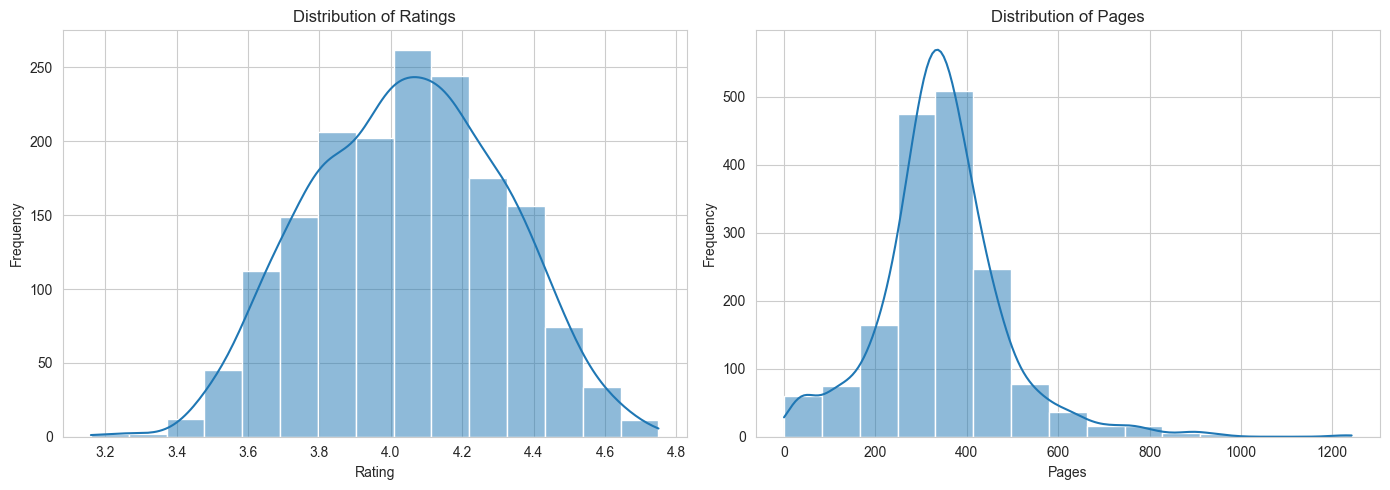

In [50]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure to hold the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for Ratings
sns.histplot(book_info['rating'], bins=15, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Ratings')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Frequency')

# Histogram for Pages
sns.histplot(book_info['pages'], bins=15, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Pages')
axes[1].set_xlabel('Pages')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


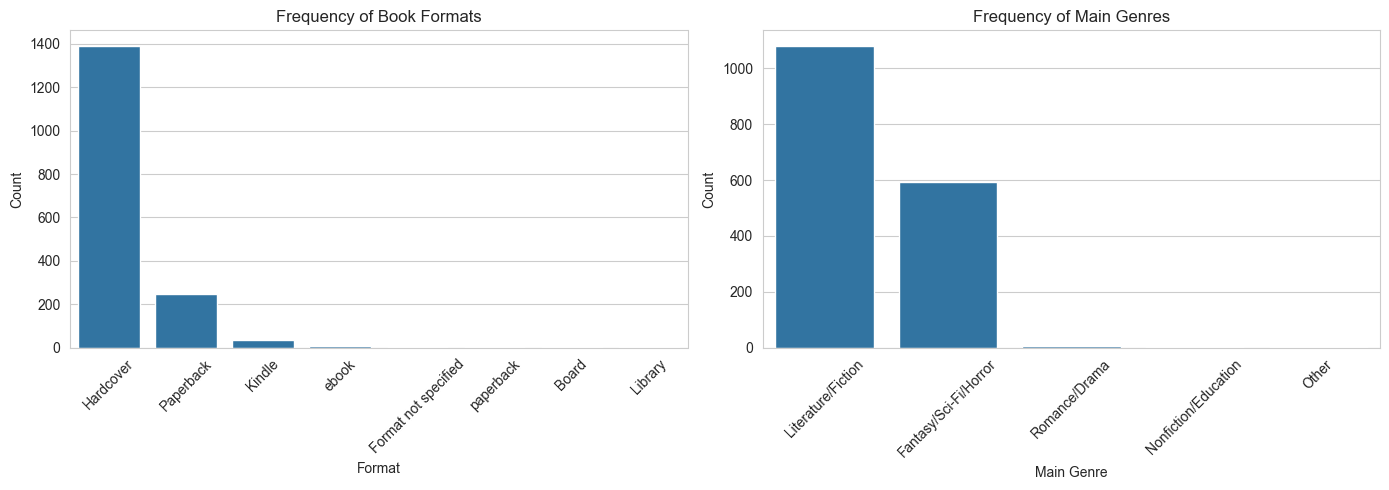

In [4]:
# Create a figure to hold the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart for Book Formats
sns.countplot(x='format', data=book_info, ax=axes[0], order=book_info['format'].value_counts().index)
axes[0].set_title('Frequency of Book Formats')
axes[0].set_xlabel('Format')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Bar chart for Main Genres
sns.countplot(x='main_genre', data=book_info, ax=axes[1], order=book_info['main_genre'].value_counts().index)
axes[1].set_title('Frequency of Main Genres')
axes[1].set_xlabel('Main Genre')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


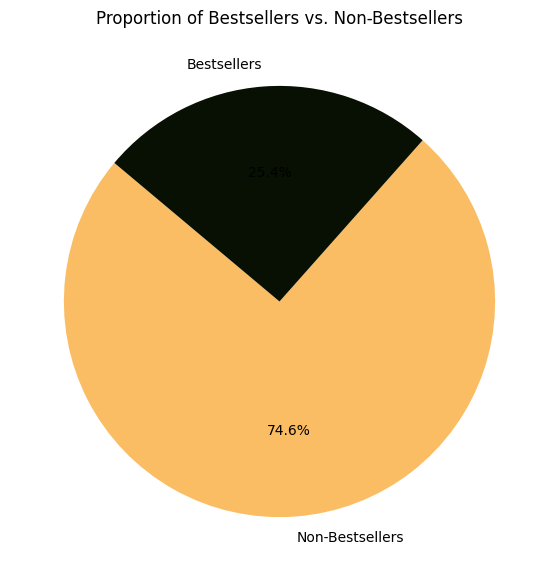

In [33]:
# Pie chart for the proportion of bestsellers vs. non-bestsellers
bestseller_counts = book_info['is_bestseller'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(bestseller_counts, labels=['Non-Bestsellers', 'Bestsellers'], autopct='%1.1f%%', startangle=140, colors=['#fabd63','#081004'])
plt.title('Proportion of Bestsellers vs. Non-Bestsellers')
plt.show()


C:\Users\54189\AppData\Local\Temp\ipykernel_12900\4034588723.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_bestseller', y='rating', data=book_info, palette='coolwarm')


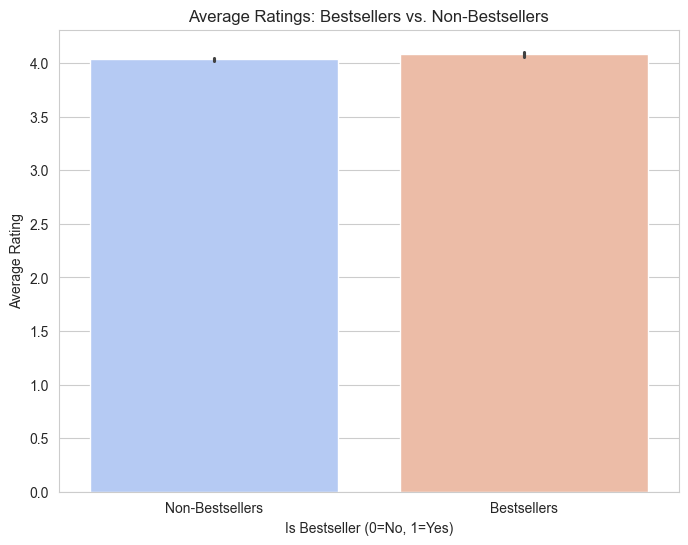

In [7]:
# Bar chart for average ratings by bestseller status
plt.figure(figsize=(8, 6))
sns.barplot(x='is_bestseller', y='rating', data=book_info, palette='coolwarm')
plt.title('Average Ratings: Bestsellers vs. Non-Bestsellers')
plt.xlabel('Is Bestseller (0=No, 1=Yes)')
plt.ylabel('Average Rating')
plt.xticks([0, 1], ['Non-Bestsellers', 'Bestsellers'])
plt.show()


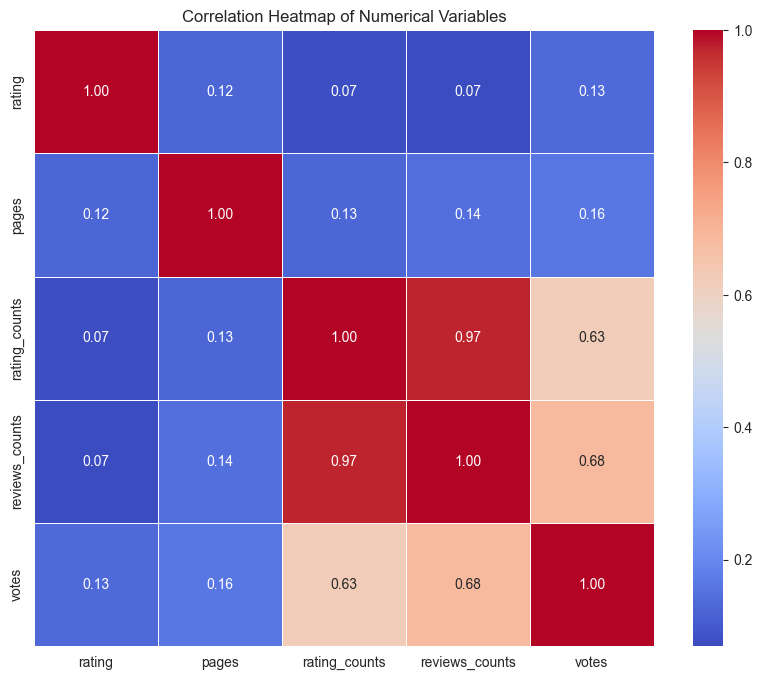

In [5]:
# Select numerical columns for correlation matrix
numerical_columns = ['rating', 'pages', 'rating_counts', 'reviews_counts', 'votes']

# Calculate the correlation matrix
correlation_matrix = book_info[numerical_columns].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


# Frequency of words in reviews with stress (predicted_stress = 1)

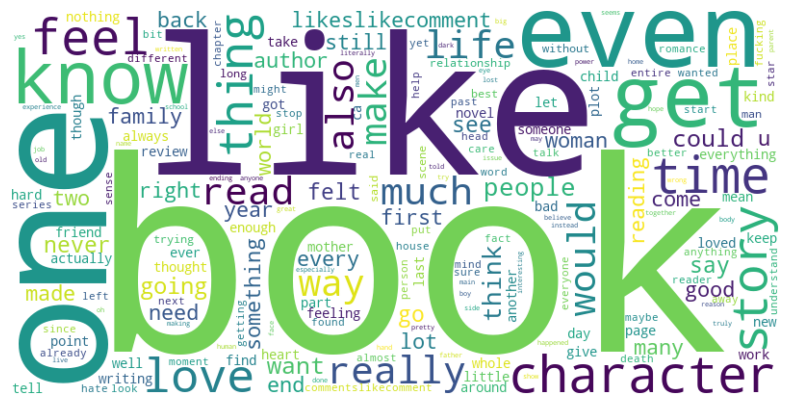

In [51]:
# filter the reviews stress=1
stress_reviews = reviews_df[reviews_df['predicted_stress'] == 1]['processed_text']

# calculate the frequency of words
words_in_stress_reviews = []
for review in stress_reviews:
    words_in_stress_reviews.extend(review.split())

word_counts_in_stress_reviews = Counter(words_in_stress_reviews)

# build a  wordcloud
wordcloud_stress = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts_in_stress_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_stress, interpolation='bilinear')
plt.axis('off')

wordcloud_stress.to_file("../img/wordcloud_review.png")
plt.show()


# Merge the book info data with the reviews data that includes predicted stress

In [52]:
# Merge the book info data with the reviews data that includes predicted stress
merged_review_data = pd.merge(reviews_df, book_info, on='title_id', how='left')
merged_review_data = merged_review_data.drop(columns=['title_y']).rename(columns={'title_x':'title'})
merged_review_data.head(3)

,title_id,title,review_no,review,processed_text,predicted_stress,author,publish_date,pages,format,rating,rating_counts,reviews_counts,votes,year,description,refined_genre,is_bestseller,award
0,111,five feet apart,1,[3.5] There’s some disagreement within the CF ...,disagreement within cf community whether book ...,0,Rachael Lippincott,2018-11-20,304.0,Hardcover,4.18,225066,20092,36232,2019,In this moving story two teens fall in love wi...,young-adult-fiction,1,best-young-adult-fiction-books-2019
1,111,five feet apart,2,Edit: For the love of God I wrote this review ...,edit love god wrote review two year ago still ...,0,Rachael Lippincott,2018-11-20,304.0,Hardcover,4.18,225066,20092,36232,2019,In this moving story two teens fall in love wi...,young-adult-fiction,1,best-young-adult-fiction-books-2019
2,111,five feet apart,3,Can't say I'm surprised I didn't enjoy this bo...,ca say surprised enjoy book part goodreads rea...,1,Rachael Lippincott,2018-11-20,304.0,Hardcover,4.18,225066,20092,36232,2019,In this moving story two teens fall in love wi...,young-adult-fiction,1,best-young-adult-fiction-books-2019


In [53]:
merged_review_data.shape

(16860, 19)

In [54]:
merged_review_data.dtypes

title_id              int64
title                object
review_no             int64
review               object
processed_text       object
predicted_stress      int64
author               object
publish_date         object
pages               float64
format               object
rating              float64
rating_counts         int64
reviews_counts        int64
votes                 int64
year                  int64
description          object
refined_genre        object
is_bestseller         int64
award                object
dtype: object

In [55]:
merged_review_data.nunique()

title_id             1686
title                1686
review_no              10
review              16811
processed_text      16662
predicted_stress        2
author               1304
publish_date          404
pages                 416
format                  8
rating                132
rating_counts        1660
reviews_counts       1547
votes                1606
year                    5
description          1686
refined_genre          21
is_bestseller           2
award                  89
dtype: int64

In [56]:
merged_review_data.describe()

,title_id,review_no,predicted_stress,pages,rating,rating_counts,reviews_counts,votes,year,is_bestseller
count,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,1.686000e+04,16860.000000,16860.000000,16860.000000,16860.000000
mean,3276.955516,5.500000,0.111507,345.276987,4.046459,7.901742e+04,9173.467972,14746.444840,2020.848161,0.254448
std,1165.380783,2.872367,0.314768,137.087111,0.266630,1.832775e+05,18626.815649,21161.583726,1.402702,0.435564
min,111.000000,1.000000,0.000000,0.000000,3.160000,8.200000e+01,19.000000,383.000000,2019.000000,0.000000
25%,2937.000000,3.000000,0.000000,273.000000,3.840000,7.302000e+03,1080.000000,2843.000000,2020.000000,0.000000
50%,3585.500000,5.500000,0.000000,338.000000,4.050000,2.400350e+04,3586.500000,7365.500000,2021.000000,0.000000
75%,4151.000000,8.000000,0.000000,406.000000,4.240000,7.319000e+04,9229.000000,19782.000000,2022.000000,1.000000
max,4697.000000,10.000000,1.000000,1242.000000,4.750000,2.683087e+06,234321.000000,397565.000000,2023.000000,1.000000


In [57]:
merged_review_data.describe(include='all')

,title_id,title,review_no,review,processed_text,predicted_stress,author,publish_date,pages,format,rating,rating_counts,reviews_counts,votes,year,description,refined_genre,is_bestseller,award
count,16860.000000,16860,16860.000000,16860,16860,16860.000000,16860,16860,16860.000000,16860,16860.000000,1.686000e+04,16860.000000,16860.000000,16860.000000,16860,16860,16860.000000,16860
unique,NaN,1686,NaN,16811,16662,NaN,1304,404,NaN,8,NaN,NaN,NaN,NaN,NaN,1686,21,NaN,89
top,NaN,five feet apart,NaN,Not found,likeslikecomment,NaN,Brandon Sanderson,2021-05-04,NaN,Hardcover,NaN,NaN,NaN,NaN,NaN,In this moving story two teens fall in love wi...,young-adult-fiction,NaN,best-young-adult-fiction-books-2019
freq,NaN,10,NaN,50,102,NaN,70,180,NaN,13930,NaN,NaN,NaN,NaN,NaN,10,1000,NaN,200
mean,3276.955516,NaN,5.500000,NaN,NaN,0.111507,NaN,NaN,345.276987,NaN,4.046459,7.901742e+04,9173.467972,14746.444840,2020.848161,NaN,NaN,0.254448,NaN
std,1165.380783,NaN,2.872367,NaN,NaN,0.314768,NaN,NaN,137.087111,NaN,0.266630,1.832775e+05,18626.815649,21161.583726,1.402702,NaN,NaN,0.435564,NaN
min,111.000000,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,3.160000,8.200000e+01,19.000000,383.000000,2019.000000,NaN,NaN,0.000000,NaN
25%,2937.000000,NaN,3.000000,NaN,NaN,0.000000,NaN,NaN,273.000000,NaN,3.840000,7.302000e+03,1080.000000,2843.000000,2020.000000,NaN,NaN,0.000000,NaN
50%,3585.500000,NaN,5.500000,NaN,NaN,0.000000,NaN,NaN,338.000000,NaN,4.050000,2.400350e+04,3586.500000,7365.500000,2021.000000,NaN,NaN,0.000000,NaN
75%,4151.000000,NaN,8.000000,NaN,NaN,0.000000,NaN,NaN,406.000000,NaN,4.240000,7.319000e+04,9229.000000,19782.000000,2022.000000,NaN,NaN,1.000000,NaN


In [58]:
merged_review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title_id          16860 non-null  int64  
 1   title             16860 non-null  object 
 2   review_no         16860 non-null  int64  
 3   review            16860 non-null  object 
 4   processed_text    16860 non-null  object 
 5   predicted_stress  16860 non-null  int64  
 6   author            16860 non-null  object 
 7   publish_date      16860 non-null  object 
 8   pages             16860 non-null  float64
 9   format            16860 non-null  object 
 10  rating            16860 non-null  float64
 11  rating_counts     16860 non-null  int64  
 12  reviews_counts    16860 non-null  int64  
 13  votes             16860 non-null  int64  
 14  year              16860 non-null  int64  
 15  description       16860 non-null  object 
 16  refined_genre     16860 non-null  object

## Correlation

In [59]:
numerical_df = merged_review_data[['pages','rating','rating_counts','reviews_counts','votes','year','is_bestseller','predicted_stress']]

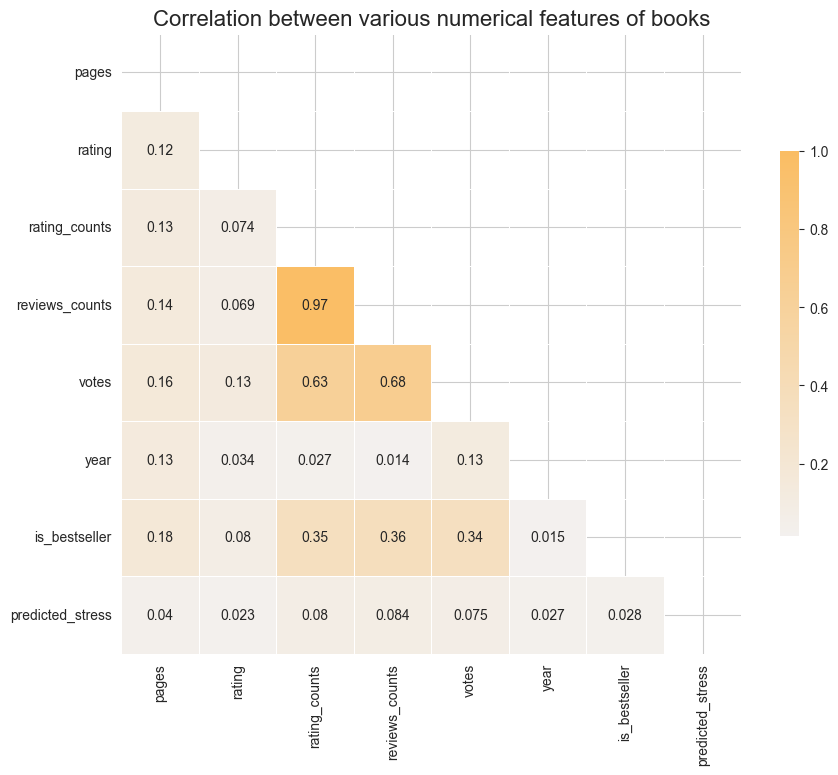

In [60]:
# Assuming numerical_df is already defined and contains your numerical data
corr = np.abs(numerical_df.corr())

# Set up mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a light palette using the hex color as a seed
cmap = sns.light_palette("#fabd63", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Set the title
plt.title('Correlation between various numerical features of books', fontsize=16)

# Show the plot
plt.show()


This heatmap displays the correlation between various numerical features of books, including reader engagement metrics and the predicted stress of reviews.

From the heatmap, we can observe that:

1. **Reader Engagement Metrics:**
   - There are positive correlations among reader engagement metrics such as `rating_counts`, `reviews_counts`, and `votes`. This indicates that books that receive more ratings tend to also have more reviews and votes, which is expected as these are indicators of reader engagement and popularity.
   - The correlation between `is_bestseller` and these engagement metrics is notably strong (ranging from 0.34 to 0.36), suggesting that bestsellers tend to have higher engagement.

2. **Predicted Stress:**
   - The correlation between predicted stress and all the other variables is quite low (ranging from 0.015 to 0.078), which suggests that the predicted stress is not strongly related to the number of pages, ratings, counts, reviews, votes, year of publication, or whether the book is a bestseller. 
   - This could indicate that the factors influencing whether a review is predicted as stressed are more complex and perhaps more related to the content and theme of the book rather than these measured engagement metrics.

3. **Year of Publication:**
   - The year of publication doesn’t show a strong correlation with any other variables, including predicted stress, which could imply that the aspects that might affect the stress perceived in the reviews are not related to the publication year, at least not directly.

4. **Pages:**
   - The number of pages shows a very weak correlation with predicted stress, suggesting that the length of the book is not a significant factor in the stress level perceived by the readers in their reviews.

This heatmap provides a visual representation that helps to quickly identify potential relationships between different book features and reader responses. However, the lack of strong correlations, particularly with predicted stress, indicates that a deeper analysis, perhaps including qualitative data or more nuanced quantitative measures, may be necessary to truly understand the drivers behind the readers' perceived stress in reviews.

In [3]:
merged_review_data['predicted_stress'].value_counts()

predicted_stress
0    14980
1     1880
Name: count, dtype: int64

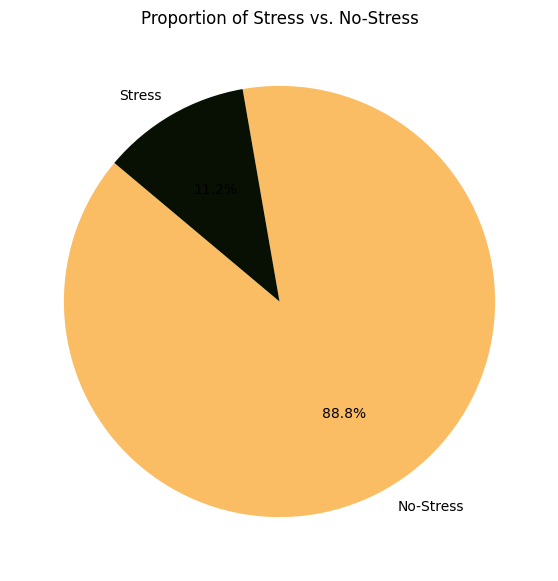

In [32]:
# Pie chart for the proportion of bestsellers vs. non-bestsellers
stress_counts = merged_review_data['predicted_stress'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(stress_counts, labels=['No-Stress', 'Stress'], autopct='%1.1f%%', startangle=140, colors=['#fabd63','#081004'])
plt.title('Proportion of Stress vs. No-Stress')
plt.show()

C:\Users\54189\AppData\Local\Temp\ipykernel_11744\3079639213.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=merged_review_data['predicted_stress'],palette='Set3')


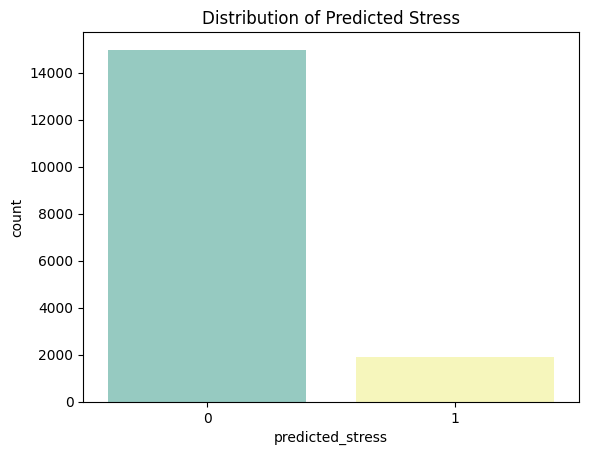

In [13]:
sns.countplot(x=merged_review_data['predicted_stress'],palette='Set3')
plt.title('Distribution of Predicted Stress')
plt.show()

In [5]:
# Group by genre and calculate the mean stress per genre
main_genre_stress_analysis = merged_review_data.groupby('main_genre')['predicted_stress'].mean().sort_values(ascending=False)
print(main_genre_stress_analysis)


main_genre
Fantasy/Sci-Fi/Horror    0.130976
Romance/Drama            0.128571
Literature/Fiction       0.100924
Nonfiction/Education     0.050000
Other                    0.000000
Name: predicted_stress, dtype: float64


- We have mapped the detailed book genres to five broader main categories and recalculated the average stress comment percentage for each category. The results show:

  - Fantasy/Sci-Fi/Horror: The average percentage of stress reviews is 13.1%.
  - Romance/Drama: The average percentage of stress reviews is 12.8%.
  - Literature/Fiction: The average percentage of stress reviews is 10.1%.
  - Nonfiction/Education: The average percentage of stress reviews is 5.0%.
  - Other: No stress reviews.
  
- Analysis Results:
- These results indicate that books in the Romance/Drama and Fantasy/Sci-Fi/Horror categories tend to evoke higher levels of stress in readers, while books in the Nonfiction/Education category show lower levels of stress. This may be related to the depth of content and emotional engagement associated with these categories of books.

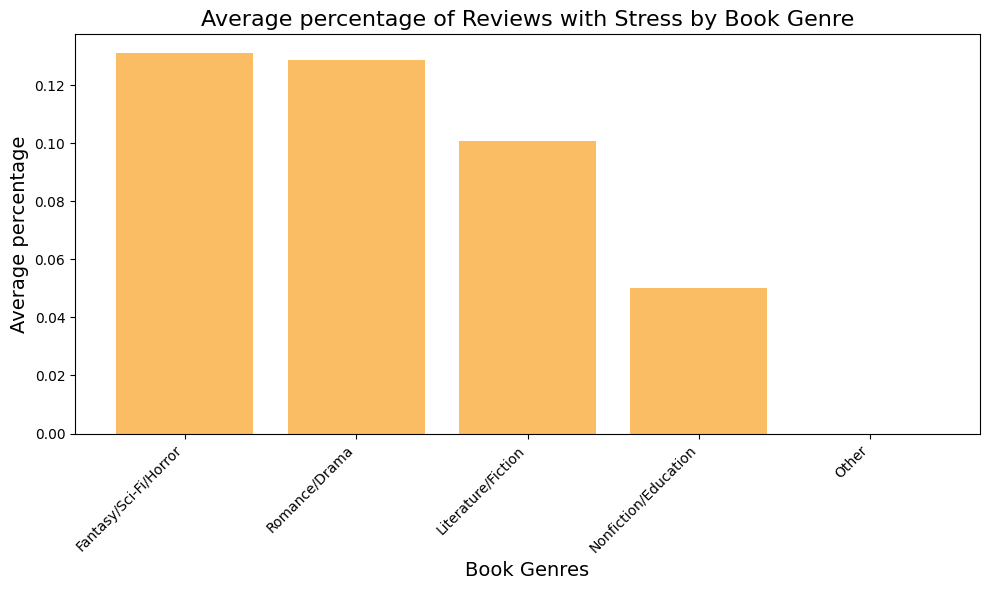

In [31]:
genres = main_genre_stress_analysis.index
mean_stress = main_genre_stress_analysis.values

plt.figure(figsize=(10, 6))
plt.bar(genres, mean_stress, color='#fabd63')  # Set the color of the bars here
plt.xlabel('Book Genres', fontsize=14)
plt.ylabel('Average percentage', fontsize=14)
plt.title('Average percentage of Reviews with Stress by Book Genre', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('../img/stress&genre.png')
plt.show()

In [62]:
# Group by genre and calculate the mean stress per genre
refined_genre_stress_analysis = merged_review_data.groupby('refined_genre')['predicted_stress'].mean().sort_values(ascending=False)
print(refined_genre_stress_analysis)

refined_genre
romantasy                0.190000
romance                  0.172632
young-adult-fantasy      0.172449
debut-novel              0.148718
mystery-thriller         0.143478
horror                   0.142553
young-adult-fiction      0.130000
fantasy                  0.123656
fiction                  0.121951
memoir-autobiography     0.120000
poetry                   0.111250
graphic-novels-comics    0.107500
science-fiction          0.106452
childrens                0.093750
humor                    0.090909
nonfiction               0.080000
historical-fiction       0.070732
science-technology       0.052500
picture                  0.042500
history-biography        0.040000
food-cookbooks           0.017500
Name: predicted_stress, dtype: float64


In [64]:
import matplotlib.colors as mcolors

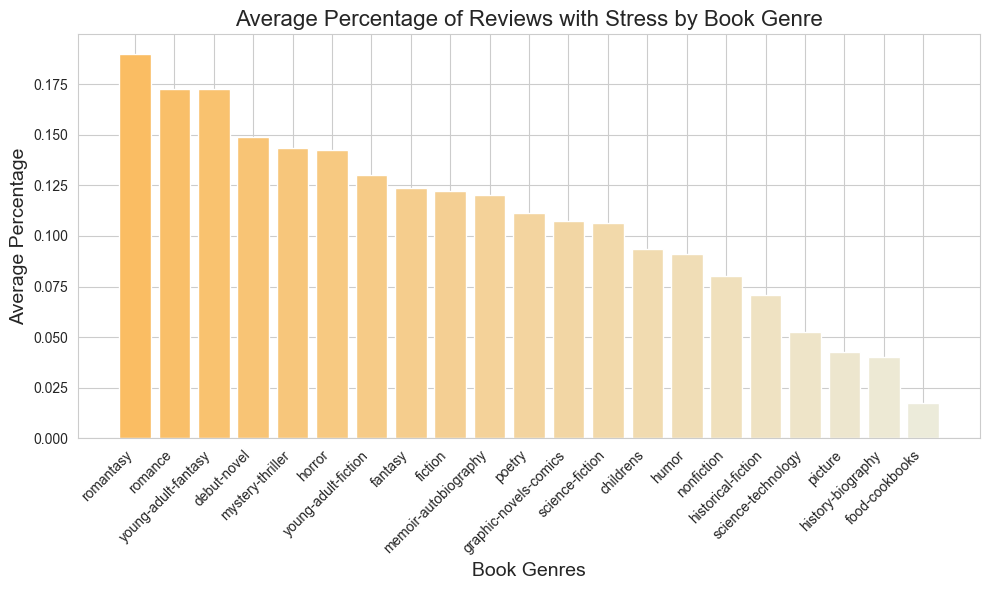

In [67]:
genres = refined_genre_stress_analysis.index
mean_stress = refined_genre_stress_analysis.values

# Create a colormap from '#fabd63' to #ecebda
cmap = mcolors.LinearSegmentedColormap.from_list("gradient", ['#fabd63','#ecebda'], N=len(genres))

# Create color array using the colormap
colors = cmap(np.linspace(0, 1, len(genres)))

plt.figure(figsize=(10, 6))
plt.bar(genres, mean_stress, color=colors)
plt.xlabel('Book Genres', fontsize=14)
plt.ylabel('Average Percentage', fontsize=14)
plt.title('Average Percentage of Reviews with Stress by Book Genre', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as requested
plt.savefig('../img/stress&genre2.png')
plt.show()

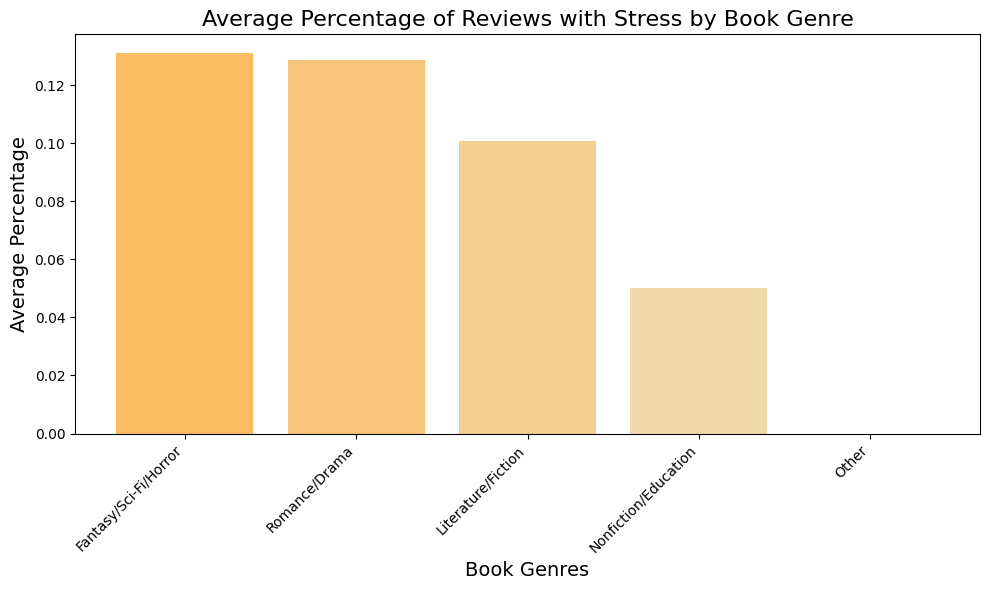

In [37]:
# Function to convert HEX to RGB
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

# Function to interpolate between two colors in RGB
def interpolate(start_color, end_color, factor: float):
    # Assumes factor is between 0 and 1.
    s = np.array(hex_to_rgb(start_color))
    e = np.array(hex_to_rgb(end_color))
    rgb = (1 - factor) * s + factor * e
    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0]), int(rgb[1]), int(rgb[2]))

# Your genre data
genres = main_genre_stress_analysis.index
mean_stress = main_genre_stress_analysis.values

# Set up the plot
plt.figure(figsize=(10, 6))

# Generate a list of colors for the gradient effect
colors = [interpolate("#fabd63", "#ecebda", i / len(genres)) for i in range(len(genres))]

# Create the bar chart
for i, (color, genre, stress) in enumerate(zip(colors, genres, mean_stress)):
    plt.bar(genre, stress, color=color)

# Set the axis labels and title
plt.xlabel('Book Genres', fontsize=14)
plt.ylabel('Average Percentage', fontsize=14)
plt.title('Average Percentage of Reviews with Stress by Book Genre', fontsize=16)

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# Apply tight layout
plt.tight_layout()

# Save the figure
plt.savefig('../img/stress_genre_gradient.png')

# Show the plot
plt.show()



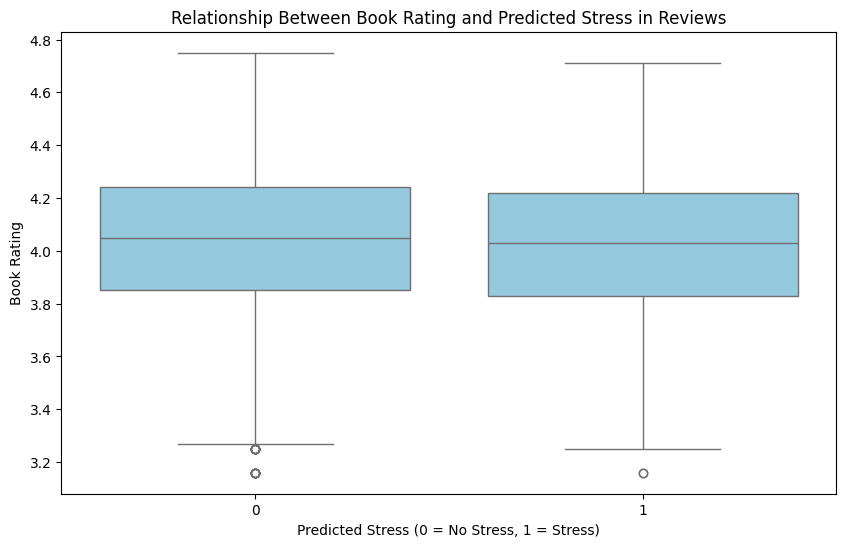

In [16]:
# Visualizing the relationship between book rating and predicted stress in reviews
plt.figure(figsize=(10, 6))
sns.boxplot(x='predicted_stress', y='rating', data=merged_review_data,color='skyblue')
plt.title('Relationship Between Book Rating and Predicted Stress in Reviews')
plt.xlabel('Predicted Stress (0 = No Stress, 1 = Stress)')
plt.ylabel('Book Rating')
plt.show()

From the chart above, we can see that both the reviews predicted to have stress (1) and those predicted not to have stress (0) seem to have a similar distribution of book ratings, with the median for both around 4.0. This suggests that there may not be a clear direct relationship between the ratings and the predicted stress level in the reviews.

Next, we can explore the relationship between book genres (main_genre) and the predicted stress in the reviews. This will help us understand whether different types of books might influence the readers' feelings of stress.

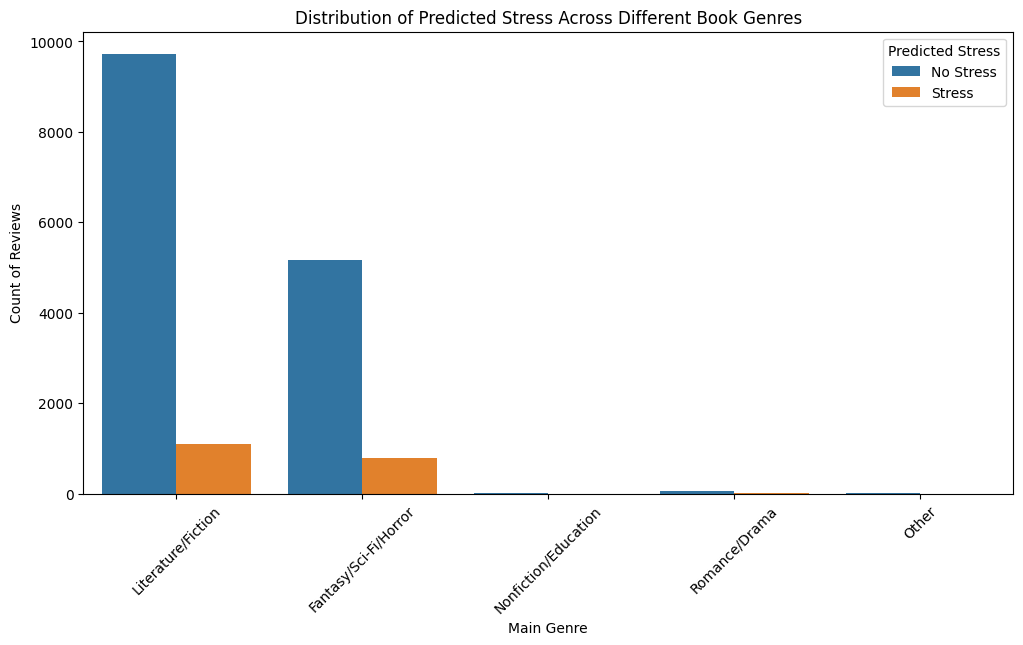

In [17]:
# Visualizing the distribution of predicted stress across different book genres
plt.figure(figsize=(12, 6))
sns.countplot(x='main_genre', hue='predicted_stress', data=merged_review_data)
plt.title('Distribution of Predicted Stress Across Different Book Genres')
plt.xlabel('Main Genre')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Predicted Stress', labels=['No Stress', 'Stress'])
plt.show()

The chart shows that there are some differences in the distribution of predicted stress in reviews across different book genres (main_genre). While the number of reviews without stress is significantly higher across all genres, certain types like "Literature/Fiction" and "Fantasy/Sci-Fi/Horror" exhibit a relatively higher number of stressed reviews. This might suggest that these genres could elicit more feelings of stress in some cases, or are associated with more engaging or emotionally rich content.

Next, we will analyze the differences in predicted stress in reviews between bestsellers and non-bestsellers. Additionally, we will conduct some text analysis to examine the differences in word usage and expression between reviews with predicted stress and those without. These analyses will help us understand the emotional characteristics expressed by readers in their reviews and the potential connections between these emotions and the characteristics of the books.

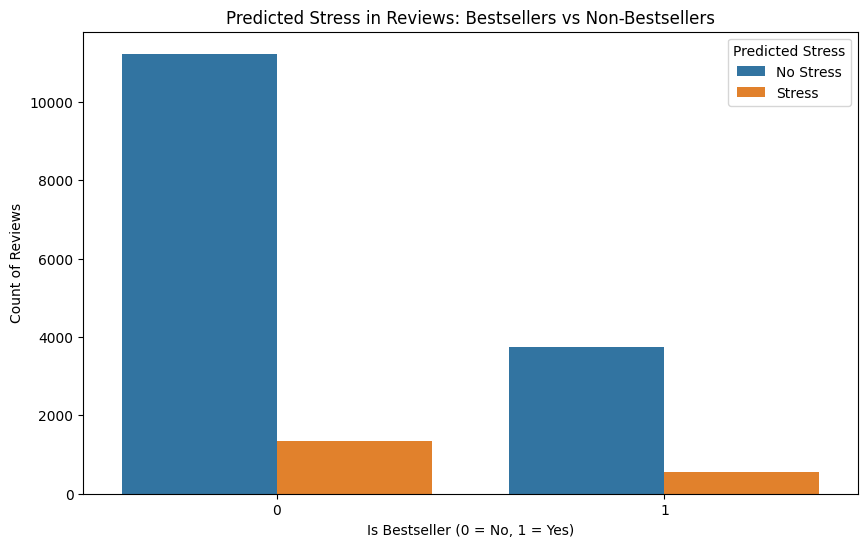

In [18]:
# Visualizing the distribution of predicted stress in reviews for bestsellers vs non-bestsellers
plt.figure(figsize=(10, 6))
sns.countplot(x='is_bestseller', hue='predicted_stress', data=merged_review_data)
plt.title('Predicted Stress in Reviews: Bestsellers vs Non-Bestsellers')
plt.xlabel('Is Bestseller (0 = No, 1 = Yes)')
plt.ylabel('Count of Reviews')
plt.legend(title='Predicted Stress', labels=['No Stress', 'Stress'])
plt.show()

In both bestsellers and non-bestsellers, the distribution of predicted stress in the reviews shows a similar pattern: in both types of books, the number of reviews without stress significantly exceeds those with stress. However, the chart indicates that despite the different total numbers of reviews, the proportion of stressed and non-stressed reviews appears relatively consistent between bestsellers and non-bestsellers.

Next, we will conduct a simple text analysis to explore the differences in word usage between reviews that contain predicted stress and those that do not. We will examine the most common words and attempt to identify specific vocabulary that may be associated with stress. This analysis can provide insights into the emotional tone of the review content. We will use word clouds (Word Clouds) to visualize these differences.

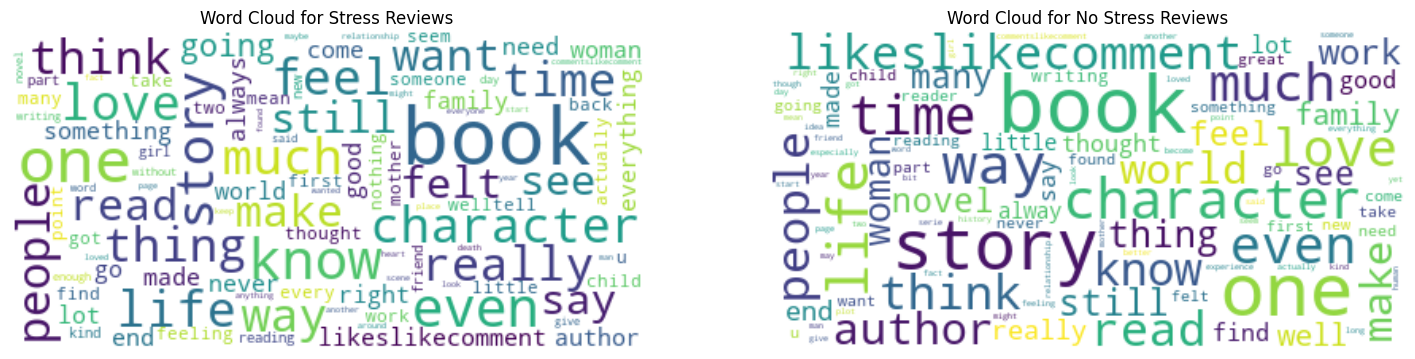

In [8]:
# Subset the reviews based on predicted stress
stress_reviews = merged_review_data[merged_review_data['predicted_stress'] == 1]['processed_text']
no_stress_reviews = merged_review_data[merged_review_data['predicted_stress'] == 0]['processed_text']

# Generate word clouds for stressed reviews
stress_text = " ".join(review for review in stress_reviews)
stress_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(stress_text)

# Generate word clouds for non-stressed reviews
no_stress_text = " ".join(review for review in no_stress_reviews)
no_stress_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(no_stress_text)

# Display the word clouds
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes[0].imshow(stress_wordcloud, interpolation='bilinear')
axes[0].set_title('Word Cloud for Stress Reviews')
axes[0].axis('off')

axes[1].imshow(no_stress_wordcloud, interpolation='bilinear')
axes[1].set_title('Word Cloud for No Stress Reviews')
axes[1].axis('off')

plt.show()


In these word clouds, we see a visual representation of the frequency of words used in reviews predicted to have stress compared to those without. This comparison can help us deduce various facets about the readers' responses and the content of the reviews.

**Stress Reviews**:
- Words like "feel," "love," "life," "even," "story," and "book" are prominently displayed. This suggests these reviews may frequently discuss emotional aspects, relationships, and narrative elements.
  
**No Stress Reviews**:
- Similarly, words like "story," "character," "book," "love," and "life" are also significant. It appears there's an overlap in the use of "story," "book," "love," and "life" with the Stress Reviews.

The presence of the word "like" followed by "s/comment" in both clouds is interesting; it might indicate a truncation issue during the generation of the word clouds, where possibly the words "likes" or "comments" were intended. This could be a point of investigation in the preprocessing of the text data.

Overall, both categories show a strong focus on storytelling and personal/emotional engagement, which is typical for book reviews. However, there may be nuanced differences not immediately evident in the word cloud due to the nature of this visualization—it highlights frequent words but doesn't show context or sentiment. To dig deeper, you might need to look at the actual reviews and use sentiment analysis or thematic analysis to understand the subtler distinctions between "Stress" and "No Stress" reviews.

The insights from these word clouds could be valuable for authors and publishers to understand what aspects of a narrative resonate with readers and provoke emotional reactions. For instance, it may be useful for an author to know if discussions of family and relationships are more likely to elicit stressed responses, which could inform the thematic development of future works.

In [7]:
df_final=pd.read_csv('../data/clean_data/final_df.csv')

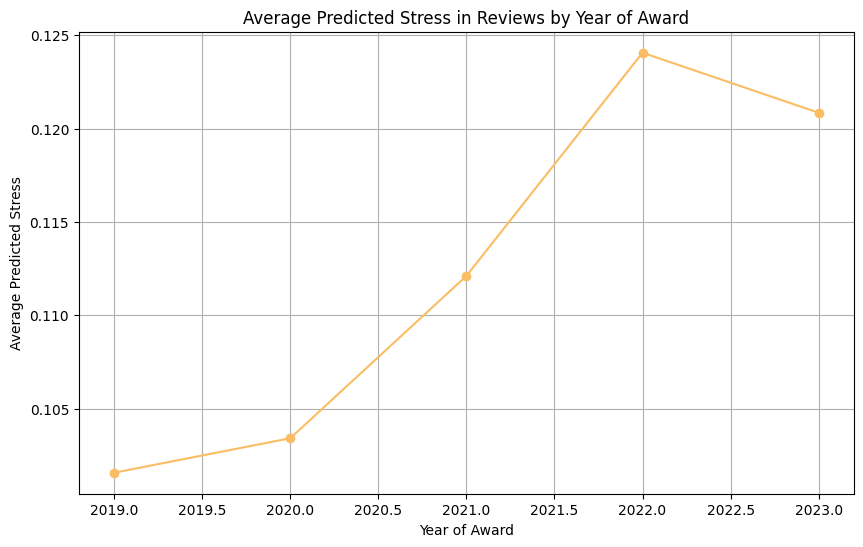

In [8]:
# Grouping by the 'year' of publication to see if there's a trend in stress over time
stress_by_year = df_final.groupby('year')['predicted_stress'].mean()

# Plotting the trend of average predicted stress over the years with a line chart
plt.figure(figsize=(10, 6))
stress_by_year.plot(kind='line', color='#fabd63', marker='o')  # Changed to line and added marker for visibility
plt.title('Average Predicted Stress in Reviews by Year of Award')
plt.xlabel('Year of Award')
plt.ylabel('Average Predicted Stress')
plt.grid(True)  # Optional: Adds a grid for easier reading

plt.show()


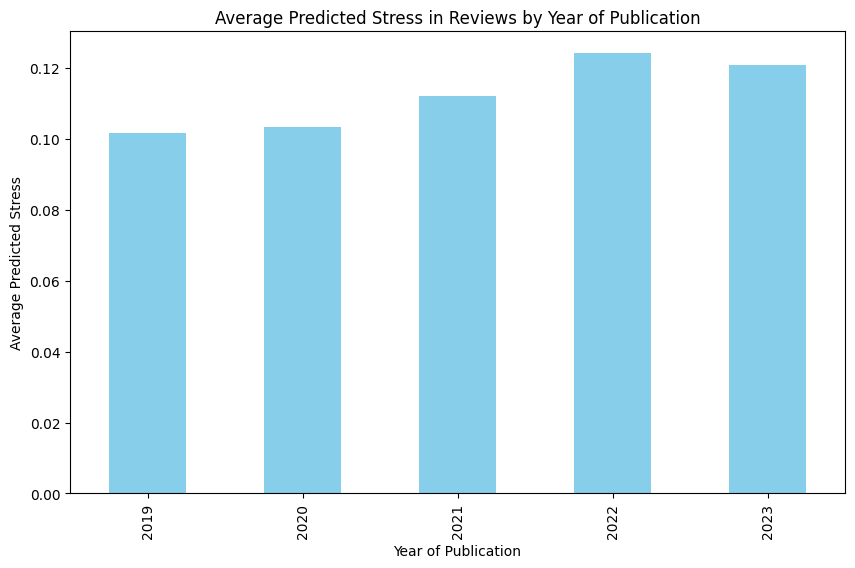

In [20]:
# Grouping by the 'year' of publication to see if there's a trend in stress over time
stress_by_year = merged_review_data.groupby('year')['predicted_stress'].mean()

# Plotting the trend of average predicted stress over the years
plt.figure(figsize=(10, 6))
stress_by_year.plot(kind='bar', color='skyblue')
plt.title('Average Predicted Stress in Reviews by Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Average Predicted Stress')

plt.show()

 It reveals that there is a relatively consistent level of stress-related discourse across the years, with a slight increase in the more recent years. This could reflect various cultural or societal shifts that influence reader sentiments or it might be indicative of the evolving nature of literature being published. The nearly steady presence of stress in reviews also underscores the enduring relevance of stress as a theme and point of discussion among readers, something that remains a constant despite the passage of time. These insights can help publishers and authors understand how themes of stress resonate with audiences over time and may inform content creation and marketing strategies accordingly.

Top authors with the highest average predicted stress:
author
Robert Kolker     0.7
Edward Ashton     0.6
Jessi Klein       0.5
Sarah Hogle       0.5
Tananarive Due    0.5
Name: predicted_stress, dtype: float64


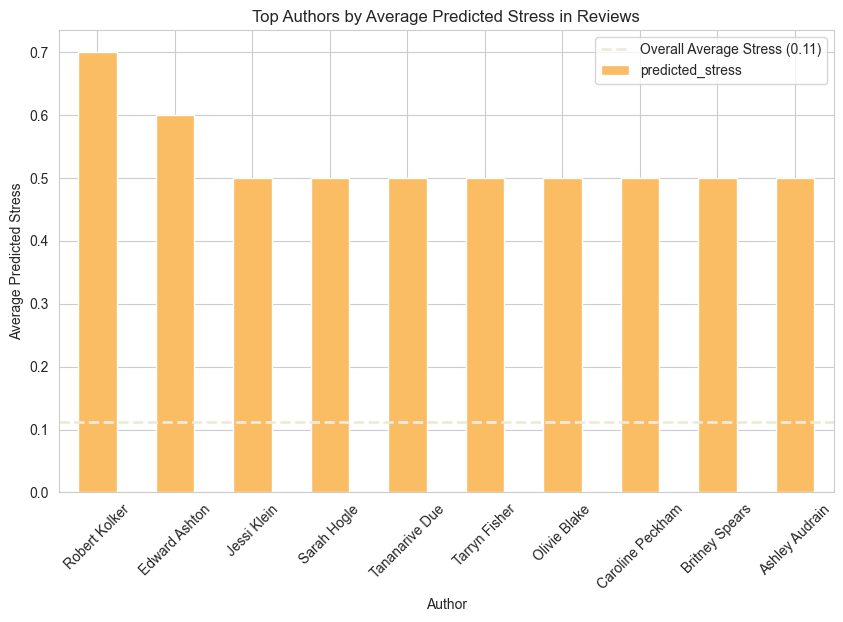

In [71]:
# Assuming that 'merged_review_data' is already defined and contains your data

# Calculating the average predicted stress for each author
author_stress_avg = merged_review_data.groupby('author')['predicted_stress'].mean().sort_values(ascending=False)

# The overall average predicted stress for comparison
overall_stress_avg = merged_review_data['predicted_stress'].mean()

# Display the top authors with the highest average predicted stress
print("Top authors with the highest average predicted stress:")
print(author_stress_avg.head())

# Now let's plot the top authors to visualize this
top_authors = author_stress_avg.head(10)  # Limiting to top 10 for a cleaner plot
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar', color="#fabd63")
plt.axhline(y=overall_stress_avg, color='#ecebda', linestyle='--', linewidth=2, label=f'Overall Average Stress ({overall_stress_avg:.2f})')
plt.title('Top Authors by Average Predicted Stress in Reviews')
plt.xticks(rotation=45)
plt.xlabel('Author')
plt.ylabel('Average Predicted Stress')
plt.legend()
plt.show()


The bar chart shows the average predicted stress in reviews for different authors, with an overall average stress level indicated by the dashed red line.

From this chart, we can draw several conclusions:

1. **Above Average Stress**: Several authors have an average predicted stress that is above the overall average. This suggests that the content of their books, or perhaps the subject matter they typically write about, may elicit a stronger stress response in readers. 

2. **Variation Among Authors**: There is variation in the average predicted stress among different authors. This could be due to a variety of factors, including genre, writing style, themes, or even reader demographics.

3. **Author-Specific Trends**: Authors like Robert Moker and Rebecca Fishbein have the highest average predicted stress in reviews. This indicates that readers' reviews of their books contain elements or expressions of stress more frequently than those of other authors.

4. **Overall Stress Level**: The overall average stress level appears to be 0.10. While some authors have averages that are significantly higher, others are closer to this benchmark, which shows a range of reader reactions.

5. **Potential for Deeper Analysis**: For authors with higher levels of predicted stress, it may be beneficial to perform further analysis to understand the drivers of this stress. This could involve looking at specific books, series, or reader reviews in detail to identify common themes.

This data could be useful for publishers and authors to gauge the impact their works have on readers and to potentially tailor future writing to reader sensitivities or preferences. It may also highlight the need for certain types of reader engagement or support, such as book club discussions or trigger warnings for sensitive content.

This bar chart titled "Top Authors by Average Predicted Stress in Reviews" appears to show the results of some analysis that predicted levels of stress in book reviews for different authors. Each bar represents the average predicted stress level for a particular author's reviews.

Key Observations:

- The first author on the left has reviews with the highest average predicted stress, surpassing the 0.6 mark.
- All authors depicted have higher average predicted stress levels than the "Overall Average Stress" line, which is indicated by the red dashed line at around 0.11.
- There's a noticeable decrease in average predicted stress from the first to the second author, but thereafter, the average stress levels are somewhat consistent across the remaining authors, fluctuating around the 0.4 to 0.5 range.

What this might suggest:

- The author to the far left could write in a genre or style that invokes higher stress levels, according to the predictions. This might be indicative of more dramatic, intense, or complex subject matter.
- The overall average stress is significantly lower than the stress levels predicted in reviews for these top authors, implying that these authors' works might be more likely to elicit strong emotional reactions related to stress.
- The consistency among most authors suggests a potential commonality in themes or writing style that resonates with readers in a way that is associated with stress.

To leverage this information, one could:

- Investigate further by reading the reviews to understand the context of the stress-related words or phrases.
- Compare the themes, genres, or writing styles of these authors to see why their books might be eliciting such responses.
- Explore the impact these stress levels have on book sales, ratings, or overall reader satisfaction.

Understanding the context behind why certain authors have higher stress levels in their reviews could be valuable for publishers, marketers, authors themselves, or recommendation systems aiming to match reader preferences.

In [11]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\54189\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment of book descriptions
merged_review_data['sentiment'] = merged_review_data['description'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Explore the relationship between the sentiment and predicted stress
sentiment_corr = merged_review_data[['sentiment', 'predicted_stress']].corr()

print("Correlation between sentiment and predicted stress:")
print(sentiment_corr)


Correlation between sentiment and predicted stress:
                  sentiment  predicted_stress
sentiment          1.000000         -0.043607
predicted_stress  -0.043607          1.000000


According to the numerical analysis, the correlation coefficient between sentiment scores and predicted stress is approximately -0.0477, indicating a very low negative correlation. Here are some interpretations:

- Low correlation: The low correlation value suggests that there is no strong direct relationship between the overall sentiment tendency (positive or negative) of book descriptions and the perceived stress in comments.

- Negative correlation: Although the correlation is very low, the negative value implies a slight tendency in the opposite direction. In other words, slightly negative sentiment scores may be slightly associated with slightly higher stress predictions, and vice versa.

- Emotional complexity: The sentiment expressed in book descriptions may be much more complex than simple positive or negative sentiment scores. Sentiment analysis may fail to capture how readers actually respond emotionally to the content of the books, especially subtle emotions or themes that may lead to stress.

Given these limitations of sentiment analysis, we may need to delve deeper into the specific content of book descriptions or examine the comment texts themselves to obtain a more detailed emotional context. Additionally, stress may be associated with specific themes or events in books that may not necessarily be reflected in the overall sentiment scores of sentiment analysis.

In [69]:
merged_review_data.to_csv('../data/clean_data/final_df.csv')

In [26]:
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
# Analyze key phrases and their relation to predicted stress
tfidf_vectorizer = TfidfVectorizer(max_features=100) # Limiting the number of features for simplicity
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_review_data['description'])

# kmean
k = 5 
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(tfidf_matrix)

merged_review_data['cluster'] = kmeans.labels_

In [28]:
merged_review_data['cluster'].value_counts()

cluster
2    5410
3    3950
1    3020
0    2600
4    1880
Name: count, dtype: int64

In [29]:
count_vectorizer = CountVectorizer(max_features=100)
count_matrix = count_vectorizer.fit_transform(merged_review_data['description'])

# topics model
lda = LDA(n_components=5, random_state=42) # number of topics = 5
lda.fit(count_matrix)

# the first 10 words of each topic
feature_names = count_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))
    print("\n")

Topic #0:
the and of to in is with from that as


Topic #1:
and to the of his in you he that we


Topic #2:
they their to the but them are it and is


Topic #3:
the to and is her she of his he but


Topic #4:
her the and of she to in is with that




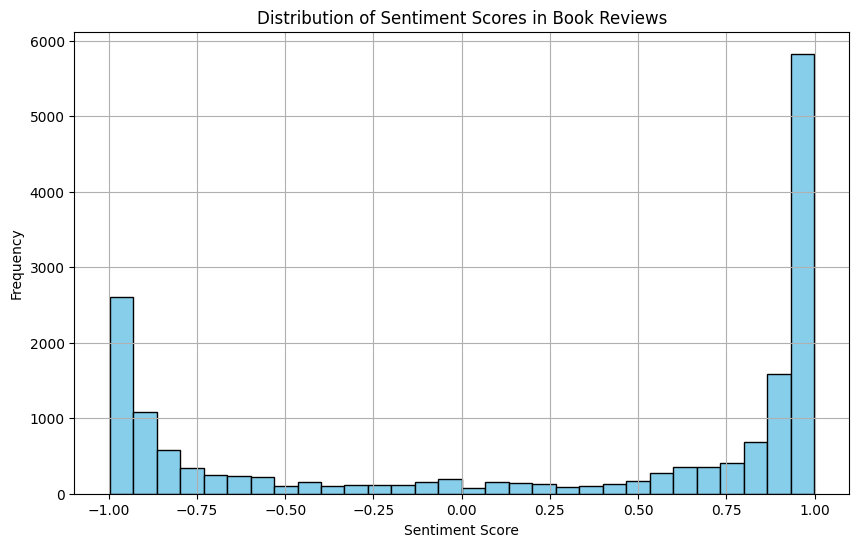

In [159]:
# Histogram of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(merged_review_data['sentiment'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores in Book Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

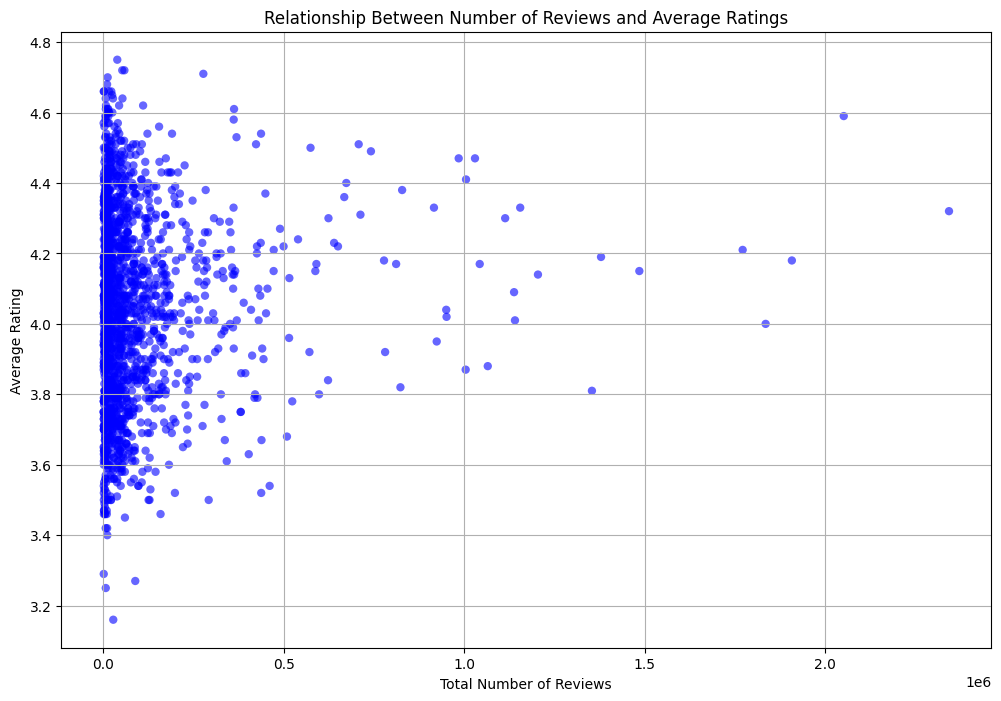

In [161]:
# Prepare data for scatter plot
# Grouping data to get average ratings and review counts by title
grouped_data = merged_review_data.groupby('title').agg({'rating': 'mean', 'reviews_counts': 'sum'}).reset_index()

# Scatter plot of review counts vs average ratings
plt.figure(figsize=(12, 8))
sns.scatterplot(data=grouped_data, x='reviews_counts', y='rating', alpha=0.6, edgecolor='none', color='blue')
plt.title('Relationship Between Number of Reviews and Average Ratings')
plt.xlabel('Total Number of Reviews')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

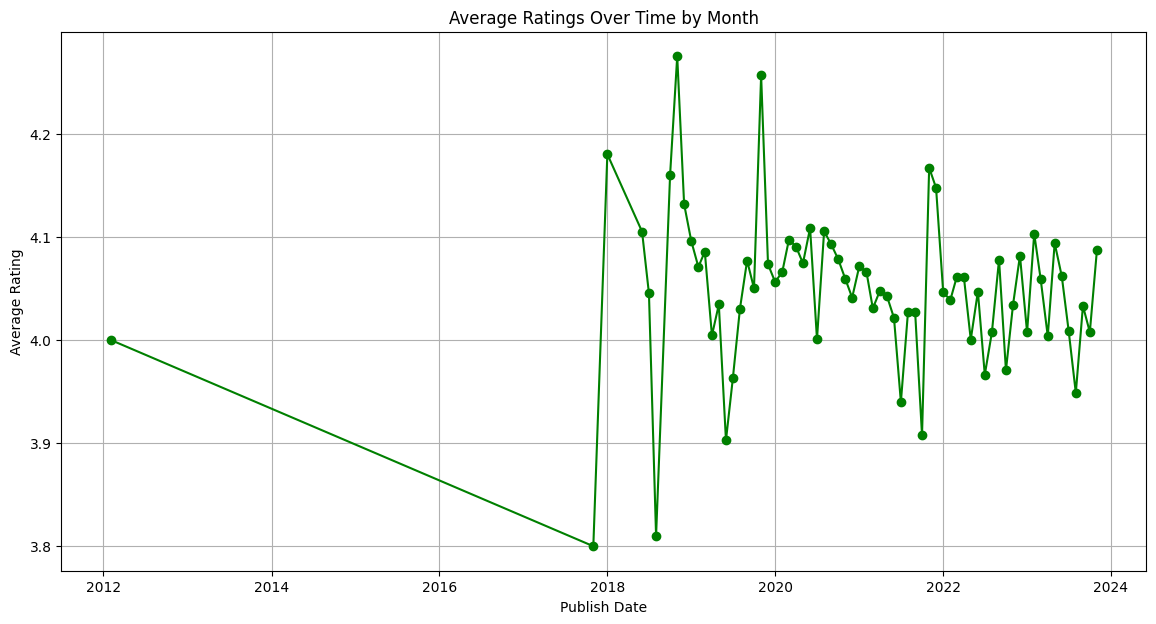

In [167]:
# Group by title and publish_date to calculate the average rating per book per publish date
grouped_time_series_data = merged_review_data.groupby(['title', merged_review_data['publish_date'].dt.to_period("M")])['rating'].mean().reset_index()
grouped_time_series_data['publish_date'] = grouped_time_series_data['publish_date'].dt.to_timestamp()

# Aggregate to find the overall average rating per month across all books
overall_average_per_month = grouped_time_series_data.groupby('publish_date')['rating'].mean().reset_index()

# Time Series plot of average ratings over time, grouped by title and averaged per month
plt.figure(figsize=(14, 7))
plt.plot(overall_average_per_month['publish_date'], overall_average_per_month['rating'], marker='o', linestyle='-', color='green')
plt.title('Average Ratings Over Time by Month')
plt.xlabel('Publish Date')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


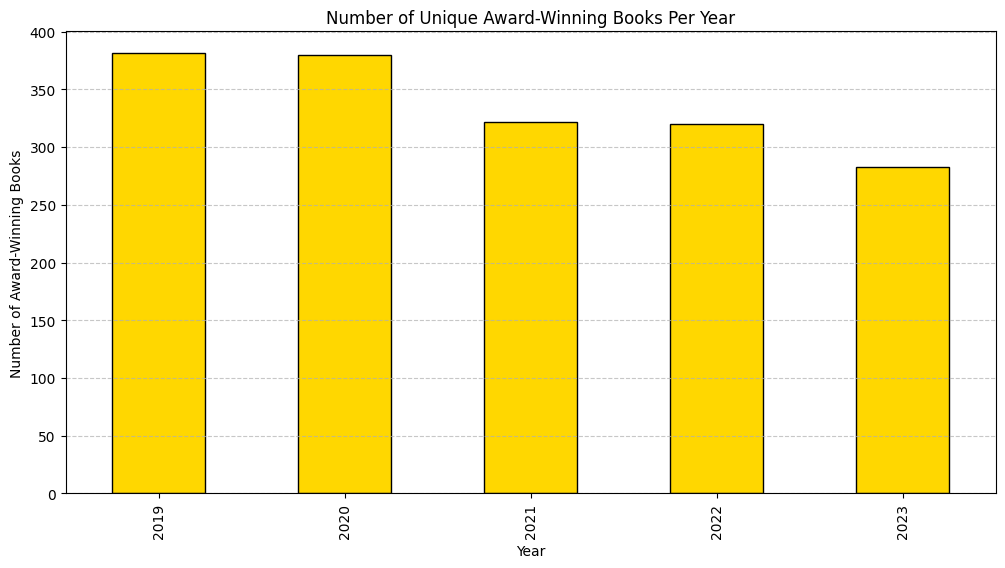

In [22]:
# Ensure each book is counted once per year it appears and has an award
awards_per_year_title_grouped = merged_review_data[merged_review_data['award'] != 'No Award'].drop_duplicates(subset=['title', 'year']).groupby('year').size()

# Bar plot of the number of award-winning books per year, grouped by unique titles
plt.figure(figsize=(12, 6))
awards_per_year_title_grouped.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Number of Unique Award-Winning Books Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Award-Winning Books')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Distribution of Sentiment Scores: The sentiment scores appear to be somewhat normally distributed with a slight left skew, indicating that reviews generally tend to have a mix of sentiments but slightly lean towards negative sentiments.
Distribution of Book Ratings: The ratings are skewed towards higher values, showing that most books in this dataset are rated relatively highly, which is common in datasets involving publicly reviewed books (often due to the bias of users who choose to rate books they like).
Distribution of Predicted Stress Levels: There is a clear imbalance in the distribution of predicted stress levels, with a much higher count of reviews predicted to have low stress compared to high stress. This could be an area to investigate further, possibly indicating a need for resampling techniques in model building to handle class imbalance.

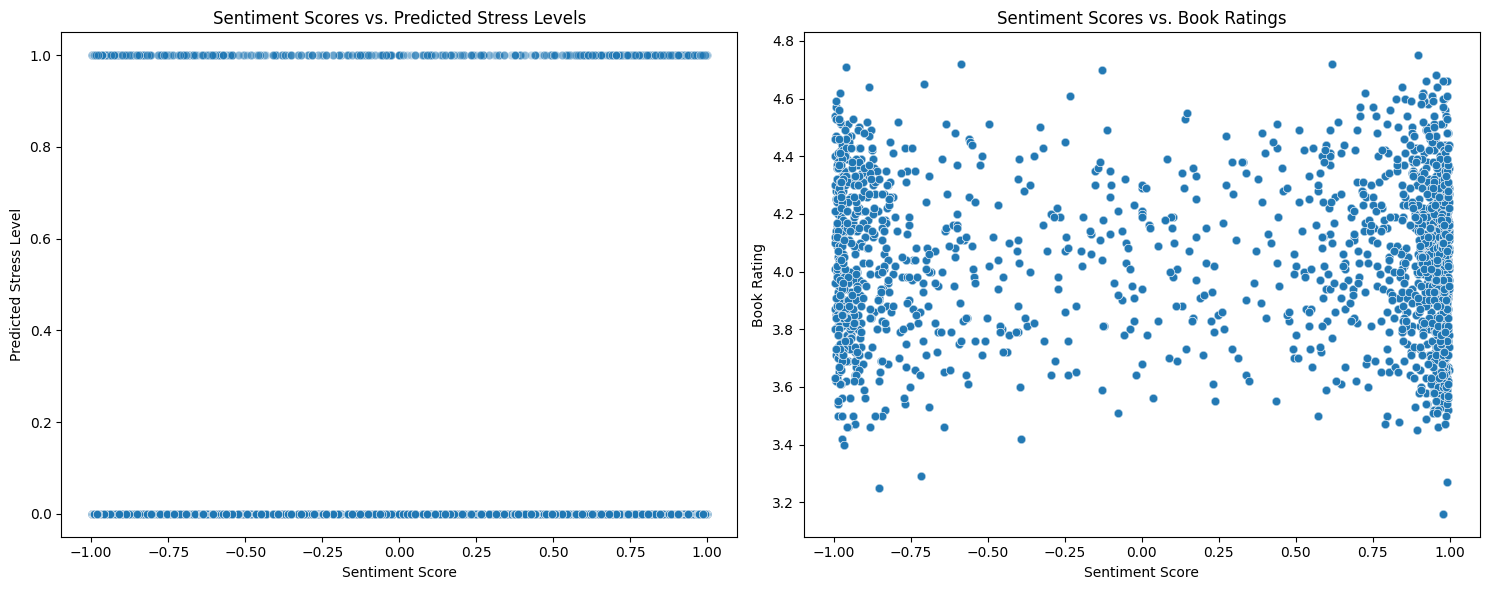

In [13]:
# Creating a figure for correlation scatter plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter plot of sentiment scores vs. predicted stress levels
sns.scatterplot(x='sentiment', y='predicted_stress', data=merged_review_data, ax=axes[0], alpha=0.3)
axes[0].set_title('Sentiment Scores vs. Predicted Stress Levels')
axes[0].set_xlabel('Sentiment Score')
axes[0].set_ylabel('Predicted Stress Level')

# Scatter plot of sentiment scores vs. book ratings
sns.scatterplot(x='sentiment', y='rating', data=merged_review_data, ax=axes[1], alpha=0.3)
axes[1].set_title('Sentiment Scores vs. Book Ratings')
axes[1].set_xlabel('Sentiment Score')
axes[1].set_ylabel('Book Rating')

plt.tight_layout()
plt.show()


Sentiment Scores vs. Predicted Stress Levels: There isn't a distinct linear relationship between sentiment scores and predicted stress levels. However, it seems that lower sentiment scores (more negative reviews) might slightly correlate with higher predicted stress, although the distribution is fairly scattered.
Sentiment Scores vs. Book Ratings: This plot shows a more noticeable trend where higher sentiment scores (positive sentiment) generally correspond to higher book ratings. This indicates that more positively reviewed books tend to have higher ratings, which is expected.

In [15]:
# Calculate the total number of stress=1 for each book
stress_count_per_book = merged_review_data[merged_review_data['predicted_stress'] == 1].groupby('title').size()

# Display the results
stress_count_per_book.sort_values(ascending=False)


title
ninth house                                                                                                                                 7
hidden valley road: inside the mind of an american family                                                                                   7
happy place                                                                                                                                 7
mickey7                                                                                                                                     6
blacktop wasteland                                                                                                                          6
                                                                                                                                           ..
stellarlune                                                                                                                                 1
